In [5]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('/content/drive/MyDrive/Curso Video Analytics/completo.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('/content/drive/MyDrive/Curso Video Analytics/livro_python.jpg',cv.IMREAD_GRAYSCALE) # trainImage
# Iniciando o detector ORB
orb = cv.ORB_create()
# Selecionando os Keypoints e descriptors com o ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

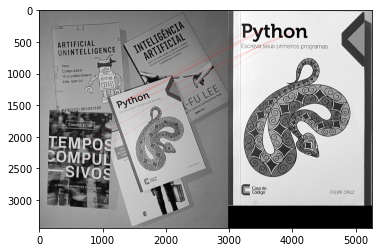

(<matplotlib.image.AxesImage at 0x7fbdd9622c90>, None)

In [13]:
# Gerando BFMatcher 
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Dando match nos descriptors 
matches = bf.match(des1,des2)

# Ordenando em relação à heurística de distância
matches = sorted(matches, key = lambda x:x.distance)

# Selecionando os 10 melhores resultados
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None, 800, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()
